<h1>Import Libraries</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1>Import Data Frame</h1>

In [3]:
df = pd.read_csv('Income.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


<h1>EDA</h1>

<b>First of all I want to see information of Features to see if there is any missing values</b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


<b>There is no missing value then I take a look of summaries of Features</b>

In [5]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


<b>Let's plot the Featurs to see which one has a linear equation with income</b>

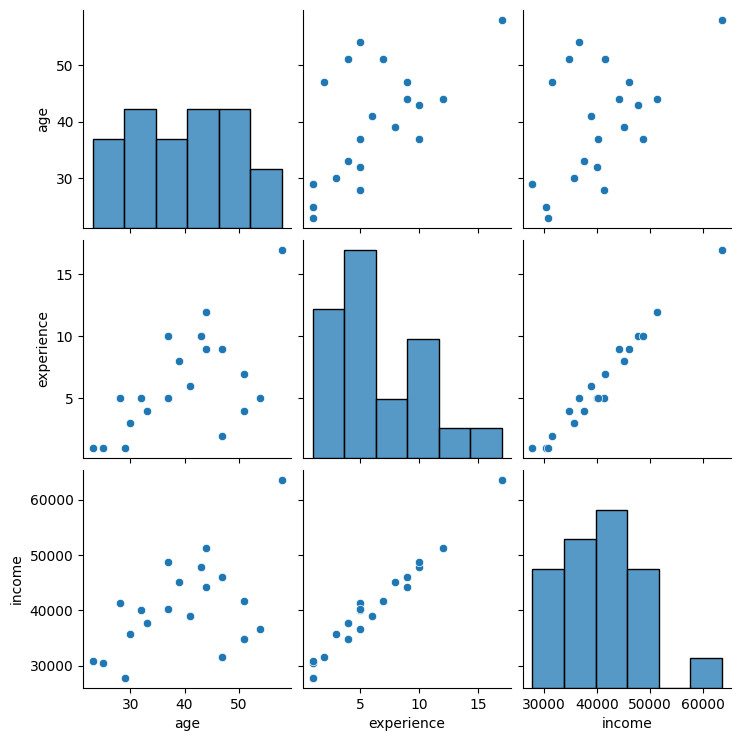

In [6]:
sns.pairplot(df)

<b>From the plots we can say there is a linear equation between exprince and income</b>

<h1>Preprocessing</h1>

<b>Standardization and Normalization are methods to rescale data<br>Standardization centers the data around the Mean and scales it according to STD (standard deviation) we use it when the data distrbution is Normal or Gaussian<br>Normalization scales the data in range [0,1] sometimes [-1,1] and it is usefull when we don't know the distrbution of data</b>

In my dataset I want to rescale the experience and income with Normalization method

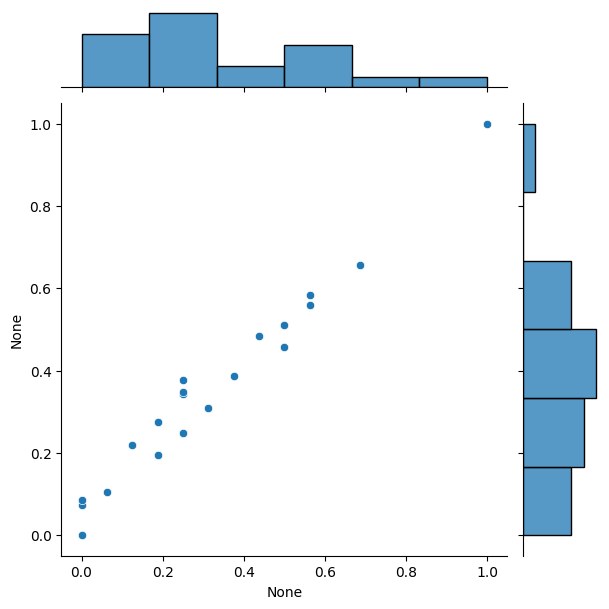

In [9]:
ExperienceMax = df['experience'].max()
ExperienceMin = df['experience'].min()
IncomeMin = df['income'].min()
IncomeMax = df['income'].max()
Experience = np.zeros(len(df['experience']))
Income = np.zeros(len(df['income']))
for i in range(20):
    Experience[i] = (df['experience'][i]-ExperienceMin)/(ExperienceMax-ExperienceMin)
    Income[i] = (df['income'][i]-IncomeMin)/(IncomeMax-IncomeMin)
sns.jointplot(x=Experience, y=Income)

<b>As we can see experience and income are rescaled between [0,1]</b>

<h1>Implementation</h1>

<h2>Gradient Descent</h2>

<b>For Gradiant Descend I wrote the function to procces with Treshold = 1e-8 and learning rate = 5e-3<br>P.S: I saved costs and Weight in a list to show the plot of costs and weight</b>

In [10]:
def mean_squared_error(y_true, y_predicted):
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
def gradient_descent(x, y, learning_rate = 0.005, 
                     stopping_threshold = 1e-8):
    current_weight = 0.1
    current_bias = 0.01
    learning_rate = learning_rate
    n = float(len(x))
    costs = []
    weights = []
    previous_cost = None
    while True:
        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
    return current_weight, current_bias, costs , weights

In [11]:
x = np.array(Experience[:20])
y = np.array(Income[:20])
estimated_weight, estimated_bias, costs , weights = gradient_descent(x, y)

<b>Let's take a look at costs and weight plot</b>

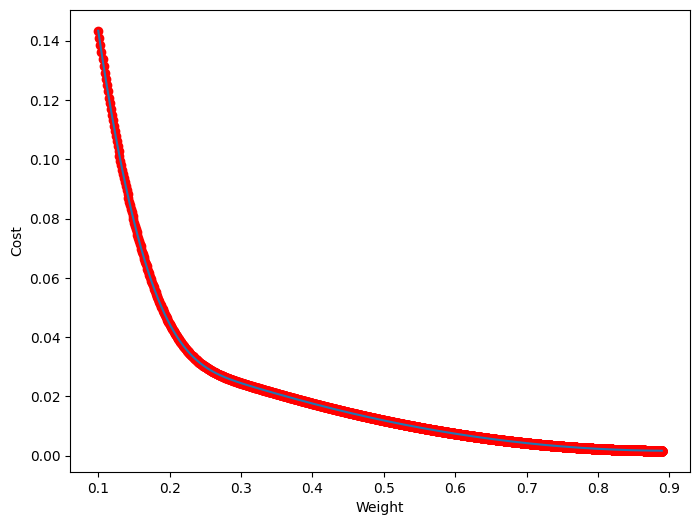

In [12]:
plt.figure(figsize = (8,6))
plt.plot(weights, costs)
plt.scatter(weights, costs, marker='o', color='red')
plt.ylabel("Cost")
plt.xlabel("Weight")
plt.show()

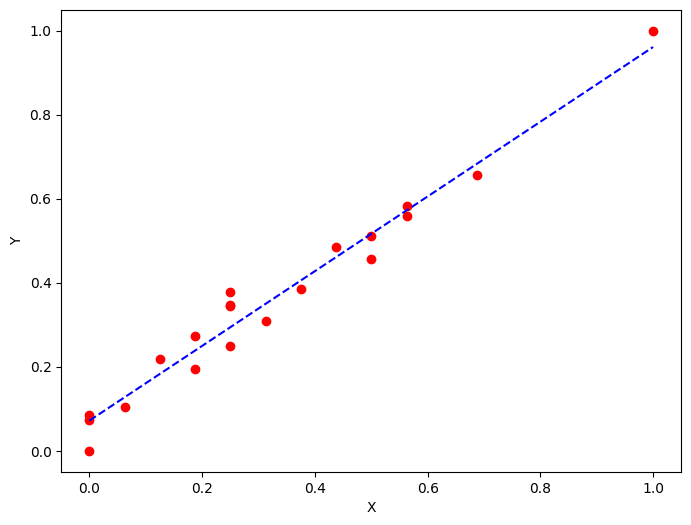

0.001664976658254992


In [13]:
Y_pred = estimated_weight*x + estimated_bias
plt.figure(figsize = (8,6))
plt.scatter(x, y , marker='o', color='red')
plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
print(mean_squared_error(y, Y_pred))

<h4>MSE (Mean Squared Error) in Gradient Descent = 0.001664976658254992</h4>

<h2>Normal Equation</h2>

<b>For this method I wrote a function to procces from the formula that was in the lectures<br>P.S: output is an array (theta) which its first element is weight and second one is bias, for procces I just multiplied theta and experiences array</b>

In [14]:
def linear_regression_normal_equation(X, y):
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_y = np.dot(X_transpose, y)
    theta = np.linalg.solve(X_transpose_X, X_transpose_y)
    return theta

In [15]:
X_with_intercept = np.c_[np.ones((x.shape[0], 1)), x]
theta = linear_regression_normal_equation(X_with_intercept, y)

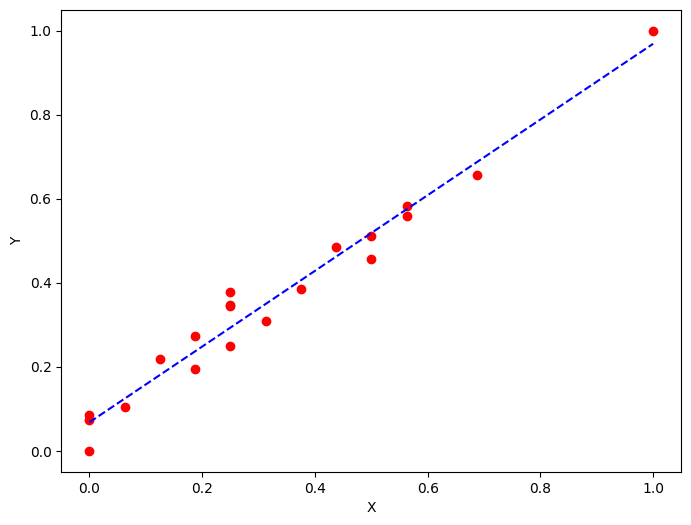

0.0016561823440170945


In [16]:
def predict(X, theta):
    predictions = np.dot(X, theta)
    return predictions
X_test_with_intercept = np.c_[np.ones((x.shape[0], 1)), x]
predictions = predict(X_test_with_intercept, theta)
plt.figure(figsize = (8,6))
plt.scatter(x, y , marker='o', color='red')
plt.plot([min(x), max(x)], [min(predictions), max(predictions)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
print(mean_squared_error(y, predictions))

<h4>MSE (Mean Squared Error) in Normal Equation = 0.0016561823440170945</h4>